In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import seaborn as sb
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [2]:
#load train data
train_data = pd.read_csv('cookies_train.csv')

print("number of features: ", train_data.shape[1])
print("number of samples: ", train_data.shape[0])
print('Sum of all null values: ', train_data.isnull().sum().sum())
print('Unique output values: ',train_data.iloc[:, -1].unique())
train_data.head()

number of features:  134
number of samples:  1738
Sum of all null values:  0
Unique output values:  ['Cookies' 'Pastries' 'Pizzas']


,Italian seasoning,Worcestershire sauce,allspice,almonds,anchovies,anise,apples,apricots,arugula,bacon,...,vanilla,vinegar,wafer cookies,walnuts,water,whipping cream,wine,yeast,zucchini,class
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cookies
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,Cookies
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cookies
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies


In [3]:
#load test data
test_data = pd.read_csv('cookies_test.csv')

print('Number of features:', test_data.shape[1])
print('Number of samples: ', test_data.shape[0])
print('Sum of all null values: ', test_data.isnull().sum().sum())
print('Unique output values: ',test_data.iloc[:, -1].unique())
test_data.head()

Number of features: 134
Number of samples:  193
Sum of all null values:  0
Unique output values:  ['Cookies' 'Pastries' 'Pizzas']


,Italian seasoning,Worcestershire sauce,allspice,almonds,anchovies,anise,apples,apricots,arugula,bacon,...,vanilla,vinegar,wafer cookies,walnuts,water,whipping cream,wine,yeast,zucchini,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Cookies
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,Cookies


In [4]:
#Check contribution and potential class imbalance
print('Cookies: ', sum(train_data.iloc[:,-1]==train_data.iloc[:,-1].unique()[0]), ',contribution: ', sum(train_data.iloc[:,-1]==train_data.iloc[:,-1].unique()[0])*100/train_data.shape[0])
print('Pastries: ',sum(train_data.iloc[:,-1]==train_data.iloc[:,-1].unique()[1]), ',contribution: ', sum(train_data.iloc[:,-1]==train_data.iloc[:,-1].unique()[1])*100/train_data.shape[0])
print('Pizzas: ',sum(train_data.iloc[:,-1]==train_data.iloc[:,-1].unique()[2]), ',contribution: ', sum(train_data.iloc[:,-1]==train_data.iloc[:,-1].unique()[2])*100/train_data.shape[0])

Cookies:  723 ,contribution:  41.59953970080552
Pastries:  619 ,contribution:  35.6156501726122
Pizzas:  396 ,contribution:  22.78481012658228


In [5]:
grouped_data = train_data.set_index('class')
cookies = grouped_data.loc['Cookies']
pastries = grouped_data.loc['Pastries']
pizzas = grouped_data.loc['Pizzas']

Number of ingredients that can possible go in the cookie recipe:  68


,ValueCookies
Ingredients,
sugar,652.0
butter,531.0
eggs,514.0
flour,505.0
salt,491.0
...,...
sandwich cookies,7.0
coffee powder,7.0
pine nuts,6.0


<Figure size 432x288 with 0 Axes>

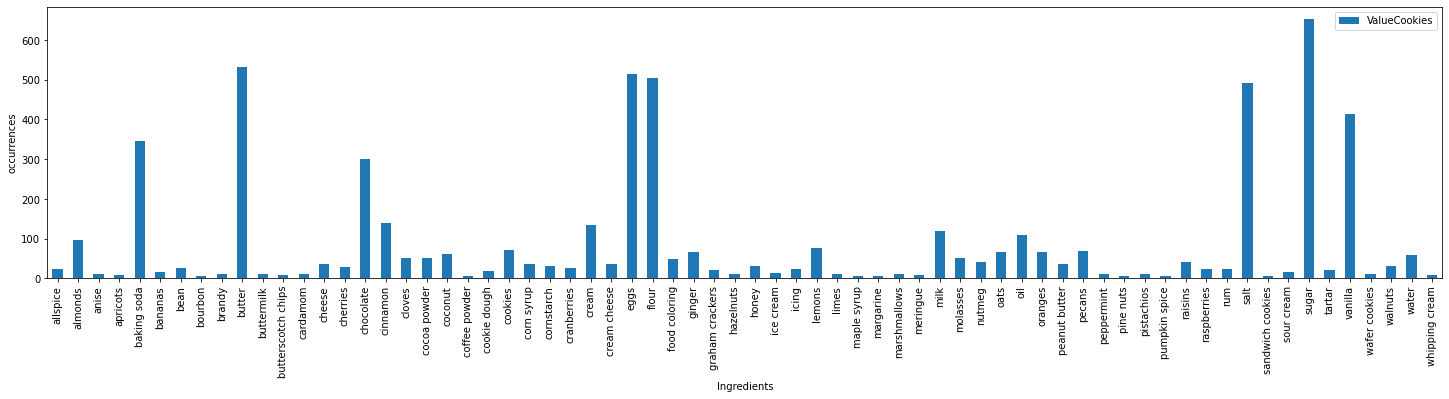

In [6]:
#cookies - histogram
df = pd.DataFrame({"Ingredients":[], "ValueCookies":[]})

for column in cookies:
    if sum(cookies[column]) > 0:
        data = [{"Ingredients": column, "ValueCookies": sum(cookies[column])}]
        df = df.append([{"Ingredients": column, "ValueCookies": sum(cookies[column])}],ignore_index=True,sort=False)


df = df.set_index('Ingredients')    
plt.figure()    
df.plot(kind = "bar", figsize=(25,5), ylabel = "occurrences")

print("Number of ingredients that can possible go in the cookie recipe: ",df.shape[0])
df = df.sort_values(by = ['ValueCookies'], ascending = False)
df

Number of ingredients that can possible go in the pasterie recipes:  83


,ValuePastries
Ingredients,
eggs,435.0
butter,412.0
sugar,403.0
flour,399.0
salt,396.0
...,...
cardamom,6.0
bell peppers,6.0
capers,3.0


<Figure size 432x288 with 0 Axes>

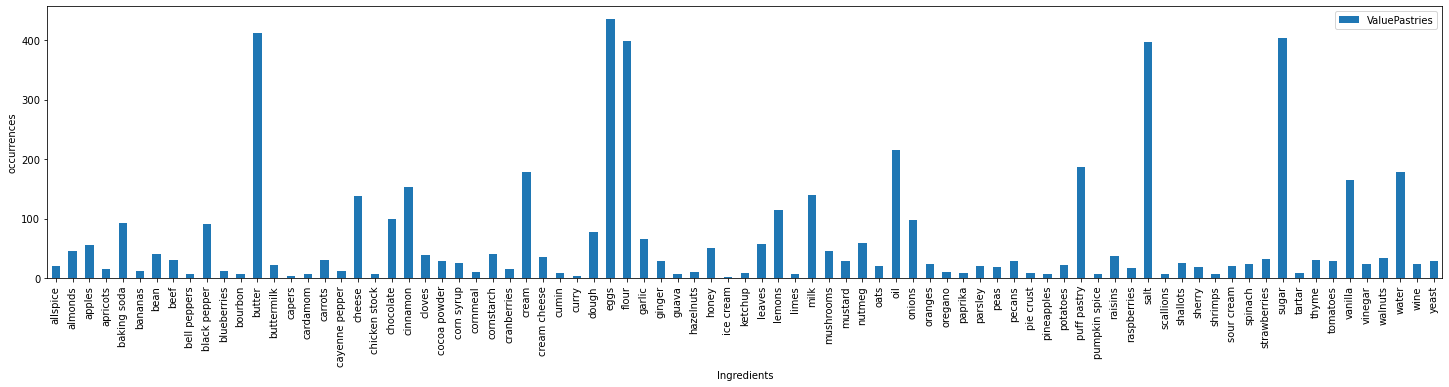

In [7]:
#Pastries - histogram
df1 = pd.DataFrame({"Ingredients":[], "ValuePastries":[]})

for column in pastries:
    if sum(pastries[column]) > 0:
        data = [{"Ingredients": column, "ValuePastries": sum(pastries[column])}]
        df1 = df1.append([{"Ingredients": column, "ValuePastries": sum(pastries[column])}],ignore_index=True,sort=False)   
df1 = df1.set_index('Ingredients')    
plt.figure()    
df1.plot(kind = "bar", figsize=(25,5), ylabel = "occurrences")

print("Number of ingredients that can possible go in the pasterie recipes: ",df1.shape[0])
df1 = df1.sort_values(by = ['ValuePastries'], ascending = False)
df1

Number of ingredients that can possible go in the pasterie recipes:  71


,ValuePizzas
Ingredients,
salt,332.0
oil,331.0
cheese,279.0
flour,221.0
dough,194.0
...,...
vanilla,6.0
hot sauce,5.0
celery,5.0


<Figure size 432x288 with 0 Axes>

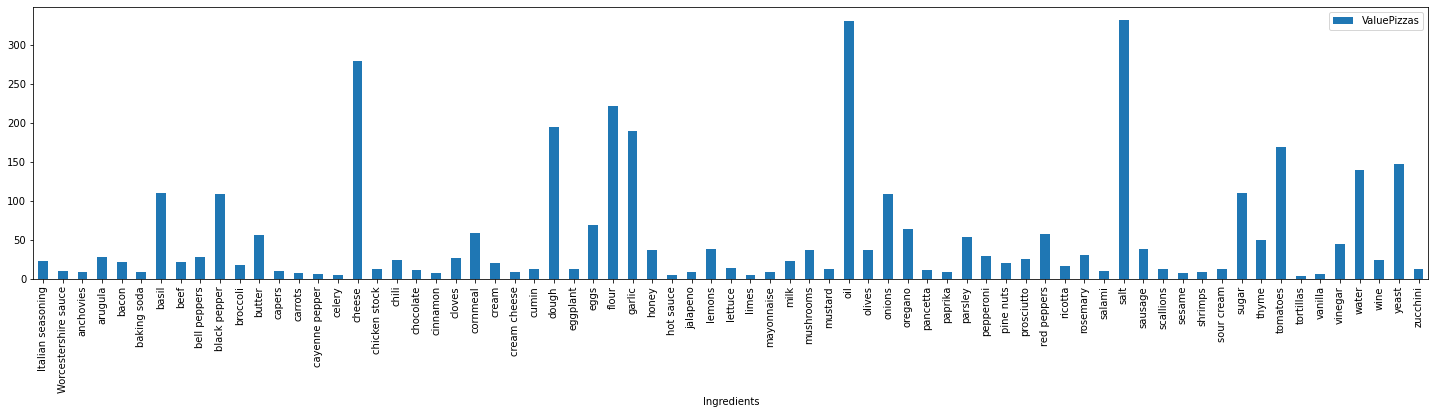

In [8]:
#pizzas - histogram
df2 = pd.DataFrame({"Ingredients":[], "ValuePizzas":[]})

for column in pizzas:
    if sum(pizzas[column]) > 0:
        data = [{"Ingredients": column, "ValuePizzas": sum(pizzas[column])}]
        df2 = df2.append([{"Ingredients": column, "ValuePizzas": sum(pizzas[column])}],ignore_index=True,sort=False)
df2 = df2.set_index('Ingredients')    
plt.figure()    
df2.plot(kind = 'bar', figsize=(25,5))

print("Number of ingredients that can possible go in the pasterie recipes: ",df2.shape[0])
df2 = df2.sort_values(by = ['ValuePizzas'], ascending = False)
df2

In [9]:
#comparison of ingredient representation
uni = pd.concat([df, df1, df2], axis = 1)
uni.sort_values(by = ['ValueCookies', 'ValuePastries', 'ValuePizzas'], ascending = False)

,ValueCookies,ValuePastries,ValuePizzas
Ingredients,,,
sugar,652.0,403.0,110.0
butter,531.0,412.0,56.0
eggs,514.0,435.0,69.0
flour,505.0,399.0,221.0
salt,491.0,396.0,332.0
...,...,...,...
jalapeno,NaN,NaN,8.0
sesame,NaN,NaN,7.0
hot sauce,NaN,NaN,5.0


In [10]:
X_training = train_data.iloc[:,:-1]
Y_training = train_data.iloc[:,-1]

X_test = test_data.iloc[:, :-1]
Y_test = test_data.iloc[:, -1]

In [11]:
def accuracy(conf_mat):
    #accuracy for each class
    accA = (conf_mat[0,0] + conf_mat[1, 1] + conf_mat[1, 2] + conf_mat[2, 1] + conf_mat[2, 2])/(conf_mat[0,0] + conf_mat[1, 1] + conf_mat[1, 2] + conf_mat[2, 1] + conf_mat[2, 2] + conf_mat[0,1] + conf_mat[0,2] + conf_mat[1,0] + conf_mat[2,0])
    accB = (conf_mat[0,0] + conf_mat[1, 1] + conf_mat[2, 2] + conf_mat[0, 2] + conf_mat[2, 0])/(conf_mat[0,0] + conf_mat[1, 1] + conf_mat[1, 2] + conf_mat[2, 1] + conf_mat[2, 2] + conf_mat[0,1] + conf_mat[0,2] + conf_mat[1,0] + conf_mat[2,0])
    accC = (conf_mat[0,0] + conf_mat[1, 1] + conf_mat[2, 2] + conf_mat[0, 1] + conf_mat[1, 0])/(conf_mat[0,0] + conf_mat[1, 1] + conf_mat[1, 2] + conf_mat[2, 1] + conf_mat[2, 2] + conf_mat[0,1] + conf_mat[0,2] + conf_mat[1,0] + conf_mat[2,0])

    print("\t----ACCURACY----")
    print("\t\tCOOKIES ACCURACY: ", accA*100, "%")
    print("\t\tPASTRIES ACCURACY: ", accB*100, "%")
    print("\t\tPIZZAS ACCURACY: ", accC*100, "%")
    

    #Prosecna tacnost klasifikatora
    acc = (accA + accB + accC)/3
    print("\t\tAVERAGE ACCURACY: ", acc*100 ,'%')  

In [12]:
#First classifier - decision tree
#finding optimal hyperparameters
skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state=42)
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 15], 
              'min_samples_split':[0.01, 0.03, 0.05, 0.07, 0.1], 'min_samples_leaf':[1, 2, 3, 4, 5], 'max_features':(None, 'log2', 'sqrt', 'auto'),'class_weight':(None, 'balanced')}
dt = DecisionTreeClassifier()
clf=GridSearchCV(dt, parameters, cv = skf, scoring = 'accuracy')

clf.fit(X_training, Y_training)
print("The best score is: ", clf.best_score_)
print("The best parameters are: ", clf.best_params_)     

The best score is:  0.8567370938808052
The best parameters are:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 0.01}


[Text(645.7434782608696, 473.95125, 'X[29] <= 0.5\ngini = 0.648\nsamples = 1738\nvalue = [723, 619, 396]'),
 Text(505.4347826086956, 443.37375000000003, 'X[99] <= 0.5\ngini = 0.566\nsamples = 1286\nvalue = [688, 481, 117]'),
 Text(492.495652173913, 412.79625, 'X[49] <= 0.5\ngini = 0.544\nsamples = 1159\nvalue = [688, 354, 117]'),
 Text(350.97391304347826, 382.21875, 'X[128] <= 0.5\ngini = 0.495\nsamples = 1062\nvalue = [688, 301, 73]'),
 Text(203.7913043478261, 351.64125, 'X[80] <= 0.5\ngini = 0.4\nsamples = 850\nvalue = [631, 185, 34]'),
 Text(168.2086956521739, 321.06375, 'X[6] <= 0.5\ngini = 0.322\nsamples = 676\nvalue = [543, 121, 12]'),
 Text(155.2695652173913, 290.48625000000004, 'X[14] <= 0.5\ngini = 0.31\nsamples = 668\nvalue = [543, 113, 12]'),
 Text(142.3304347826087, 259.90875, 'X[87] <= 0.5\ngini = 0.299\nsamples = 661\nvalue = [543, 107, 11]'),
 Text(129.3913043478261, 229.33125, 'X[42] <= 0.5\ngini = 0.289\nsamples = 656\nvalue = [543, 106, 7]'),
 Text(116.45217391304348,

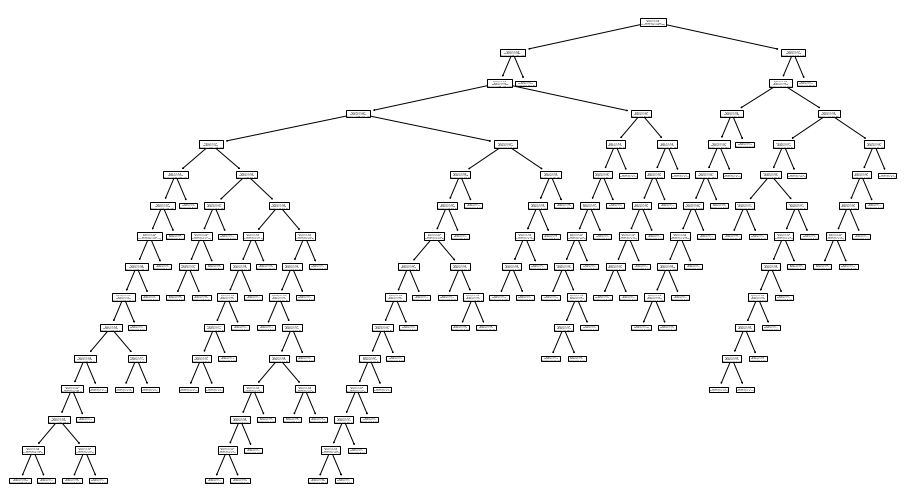

In [13]:
#DECISION TREE
#training 
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15, min_samples_split=0.01)
dt.fit(X_training, Y_training)
plt.figure(figsize=(16,9))
tree.plot_tree(dt)

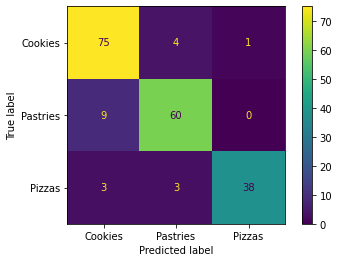

	----ACCURACY----
		COOKIES ACCURACY:  91.19170984455958 %
		PASTRIES ACCURACY:  91.70984455958549 %
		PIZZAS ACCURACY:  96.37305699481865 %
		AVERAGE ACCURACY:  93.09153713298791 %
percentage of accurately classified samples:  89.63730569948186 %


In [14]:
#confusion matrix
plot_confusion_matrix(dt, X_test, Y_test)  
plt.show()
y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred) 
accuracy(conf_matrix)
print('percentage of accurately classified samples: ', np.trace(conf_matrix)/sum(sum(conf_matrix))*100, '%')

In [15]:
#RANDOM FOREST
#finding optimal hyperparameters
skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state=42)
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[10, 15], 
              'min_samples_split':[0.01, 0.03], 'n_estimators':[100, 200], 'oob_score':[True, False]}
rfdt = RandomForestClassifier()
clf = GridSearchCV(rfdt, parameters, cv = skf, scoring = 'accuracy')
print(clf)

clf.fit(X_training, Y_training)
print("The best score is: ", clf.best_score_)
print("The best parameters are: ", clf.best_params_)   

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [10, 15],
                         'min_samples_split': [0.01, 0.03],
                         'n_estimators': [100, 200],
                         'oob_score': [True, False]},
             scoring='accuracy')
The best score is:  0.901604544548535
The best parameters are:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 0.01, 'n_estimators': 200, 'oob_score': False}


In [16]:
#RANDOM FOREST
#training
rfdt = RandomForestClassifier(class_weight=None, bootstrap = False, criterion='gini', max_depth=15, min_samples_split=0.01, n_estimators = 100, oob_score = False)
rfdt.fit(X_training, Y_training)

RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_split=0.01)

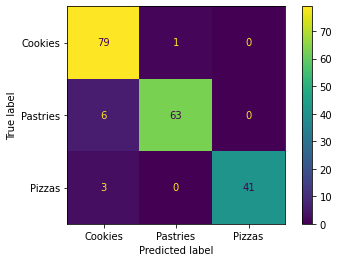

	----ACCURACY----
		COOKIES ACCURACY:  94.81865284974094 %
		PASTRIES ACCURACY:  96.37305699481865 %
		PIZZAS ACCURACY:  98.44559585492227 %
		AVERAGE ACCURACY:  96.54576856649396 %
percentage of accurately classified samples:  94.81865284974094 %


In [17]:
#RANDOM FOREST
#confusion matrix
plot_confusion_matrix(rfdt, X_test, Y_test)  
plt.show()
y_pred = rfdt.predict(X_test)
conf_matrix_rf = confusion_matrix(Y_test, y_pred) 
accuracy(conf_matrix_rf)
print('percentage of accurately classified samples: ', np.trace(conf_matrix_rf)/sum(sum(conf_matrix_rf))*100, '%')

In [18]:
#LOGISTIC REGRESSION
#optimal hyperparameters
skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state=42)
parameters = {'class_weight':['balanced', None], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'multi_class':['ovr', 'auto'],'max_iter':[100, 200, 300, 400, 500]}
lg = LogisticRegression()
clf=GridSearchCV(lg, parameters, cv = skf, scoring = 'accuracy')
print(clf)

clf.fit(X_training, Y_training)
print("The best score is: ", clf.best_score_)
print("The best parameters are: ", clf.best_params_)     

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced', None],
                         'max_iter': [100, 200, 300, 400, 500],
                         'multi_class': ['ovr', 'auto'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')
The best score is:  0.9154308683808384
The best parameters are:  {'class_weight': 'balanced', 'max_iter': 100, 'multi_class': 'auto', 'solver': 'newton-cg'}


In [19]:
#LOGISTIC REGRESSION
#training
lg = LogisticRegression(class_weight = 'balanced', multi_class = 'auto', solver = 'newton-cg', max_iter = 100)
lg.fit(X_training, Y_training)

LogisticRegression(class_weight='balanced', solver='newton-cg')

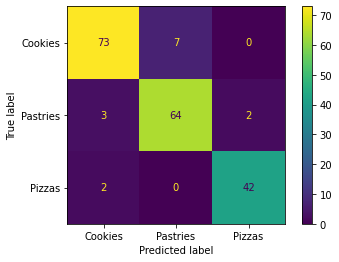

	----ACCURACY----
		COOKIES ACCURACY:  93.78238341968913 %
		PASTRIES ACCURACY:  93.78238341968913 %
		PIZZAS ACCURACY:  97.92746113989638 %
		AVERAGE ACCURACY:  95.16407599309153 %
percentage of accurately classified samples:  92.74611398963731 %


In [20]:
#LOGISTIC REGRESSION
#confusion matrix
plot_confusion_matrix(lg, X_test, Y_test)  
plt.show()
y_pred = lg.predict(X_test)
conf_matrix_lg = confusion_matrix(Y_test, y_pred) 
accuracy(conf_matrix_lg)
print('percentage of accurately classified samples: ', np.trace(conf_matrix_lg)/sum(sum(conf_matrix_lg))*100, '%')

In [21]:
def evaluation(conf_mat):
    
    #precision
    prec_mic = (conf_mat[0,0] + conf_mat[1,1] + conf_mat[2,2])/(conf_mat[0,0] + conf_mat[1,0] + conf_mat[2,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[2,1] + conf_mat[2,2] + conf_mat[0,2] + conf_mat[1,2])
    print("\t----PRECISION----\n\t\tMIKRO: ", prec_mic*100, '%')
    prec_cookies = conf_mat[0,0]/(conf_mat[0,0] + conf_mat[1,0] + conf_mat[2,0])
    prec_pas = conf_mat[1,1]/(conf_mat[1,1] + conf_mat[0,1] + conf_mat[2,1])
    prec_pizzas = conf_mat[2,2]/(conf_mat[2,2] + conf_mat[0,2] + conf_mat[1,2])
    prec_mac = (prec_cookies + prec_pas + prec_pizzas)/3
    print("\t\tMAKRO:", prec_mac*100, '%')
    print("\t\tCOOKIES: ", prec_cookies*100, '%')
    print("\t\tPASTERIES: ", prec_pas*100, '%')
    print("\t\tPIZZAS: ", prec_pizzas*100, '%')
    
    #sensitivity 
    rec_mic = (conf_mat[0,0] + conf_mat[1,1] + conf_mat[2,2])/(conf_mat[0,0] + conf_mat[0,1] + conf_mat[0,2] + conf_mat[1,1] + conf_mat[1,0] + conf_mat[1,2] + conf_mat[2,2] + conf_mat[0,0] + conf_mat[0,1])
    print("\t----SENSITIVITY----\n\t\tMIKRO: ", rec_mic)
    rec_cookies = conf_mat[0,0]/(conf_mat[0,0] + conf_mat[0,1] + conf_mat[0,2])
    rec_pas = conf_mat[1,1]/(conf_mat[1,1] + conf_mat[1,0] + conf_mat[1,2])
    rec_pizzas = conf_mat[2,2]/(conf_mat[2,2] + conf_mat[2,0] + conf_mat[2,1]) 
    rec_mac = (rec_cookies + rec_pas + rec_pizzas)/3
    print("\t\tMAKRO:", rec_mac*100, '%')
    print("\t\tCOOKIES: ", rec_cookies*100, '%')
    print("\t\tPASTERIES: ", rec_pas*100, '%')
    print("\t\tPIZZAS: ", rec_pizzas*100, '%')
    
    #specificity
    spec_cookies = (conf_mat[1,1] + conf_mat[1,2] + conf_mat[2,1] + conf_mat[2,2])/(conf_mat[1,1] + conf_mat[1,2] + conf_mat[2,1] + conf_mat[2,2] + conf_mat[0,1] + conf_mat[0,2]) 
    spec_pas = (conf_mat[0,0] + conf_mat[0,2] + conf_mat[2,0] + conf_mat[2,2])/(conf_mat[0,0] + conf_mat[0,2] + conf_mat[2,0] + conf_mat[2,2] + conf_mat[0,1] + conf_mat[2,1]) 
    spec_pizzas = (conf_mat[0,0] + conf_mat[0,1] + conf_mat[1,0] + conf_mat[1,1])/(conf_mat[0,0] + conf_mat[0,1] + conf_mat[1,0] + conf_mat[1,1] + conf_mat[0,2] + conf_mat[1,2])
    print("\t----SPECIFICITY----")
    print("\t\tCOOKIES: ", spec_cookies*100, '%')
    print("\t\tPASTERIES: ", spec_pas*100, '%')
    print("\t\tPIZZAS: ", spec_pizzas*100, '%')
    
    #accuracy
    accuracy(conf_mat)
    
    #F-score
    f_mic = (2*(prec_mic*rec_mic))/(prec_mic + rec_mic)
    print("\t\tMIKRO: ", f_mic*100, '%')
    f_mac = (2*(prec_mac*rec_mac))/(prec_mac + rec_mac)
    print("\t\tMAKRO:", f_mac*100, '%')
    
    

In [22]:
print("LOGISTIC REGRESSION")
evaluation(conf_matrix_lg)

LOGISTIC REGRESSION
	----PRECISION----
		MIKRO:  92.74611398963731 %
		MAKRO: 93.06171137157052 %
		COOKIES:  93.58974358974359 %
		PASTERIES:  90.14084507042254 %
		PIZZAS:  95.45454545454545 %
	----SENSITIVITY----
		MIKRO:  0.6605166051660517
		MAKRO: 93.15272288098375 %
		COOKIES:  91.25 %
		PASTERIES:  92.7536231884058 %
		PIZZAS:  95.45454545454545 %
	----SPECIFICITY----
		COOKIES:  93.91304347826087 %
		PASTERIES:  94.35483870967742 %
		PIZZAS:  98.65771812080537 %
	----ACCURACY----
		COOKIES ACCURACY:  93.78238341968913 %
		PASTRIES ACCURACY:  93.78238341968913 %
		PIZZAS ACCURACY:  97.92746113989638 %
		AVERAGE ACCURACY:  95.16407599309153 %
		MIKRO:  77.15517241379311 %
		MAKRO: 93.10719488553387 %


In [23]:
print("RANDOM FOREST")
evaluation(conf_matrix_rf)

RANDOM FOREST
	----PRECISION----
		MIKRO:  94.81865284974094 %
		MAKRO: 96.07007575757575 %
		COOKIES:  89.77272727272727 %
		PASTERIES:  98.4375 %
		PIZZAS:  100.0 %
	----SENSITIVITY----
		MIKRO:  0.6777777777777778
		MAKRO: 94.41205533596838 %
		COOKIES:  98.75 %
		PASTERIES:  91.30434782608695 %
		PIZZAS:  93.18181818181817 %
	----SPECIFICITY----
		COOKIES:  99.04761904761905 %
		PASTERIES:  99.19354838709677 %
		PIZZAS:  100.0 %
	----ACCURACY----
		COOKIES ACCURACY:  94.81865284974094 %
		PASTRIES ACCURACY:  96.37305699481865 %
		PIZZAS ACCURACY:  98.44559585492227 %
		AVERAGE ACCURACY:  96.54576856649396 %
		MIKRO:  79.04967602591793 %
		MAKRO: 95.23384956356492 %
